## Learning Objectives:

By the end of this lesson, students will be able to:

- Describe an outlier and how to remove outliers for univariate data
- Visualize the outliers through box-plots
- Describe how to use a Gaussian Mixture Model to fit a data distribution
- Understand correlation and visualize the correlation amongst features

## Outlier Detection

- **Outliers** are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset. 

- The hardest part of this is determining which data points are acceptable, and which ones constitute as "outliers".

## Activity: find and remove outliers if our dataset is Normal

When our sample data is close to normal distribution, the samples that are _three standard deviations away from the mean_ can be considered outliers.

**Task**: Write a function that first finds outliers for a normally distributed data, then remove them.

**Hint**: Data samples that are below `mean - 3*std` and above `mean + 3*std` are outliers for Normal distribution 

In [ ]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

## Interquartile range (IQR)

We use IQR for finding and removing outliers when the data has any kind of distribution

[John Tukey](https://en.wikipedia.org/wiki/John_Tukey) suggested to _calculate the range between the first quartile (25%) and third quartile (75%) in the data_, which is  the IQR.

## Activity:  IQR outlier detection and removal

**Task**: write a function to find and remove outliers based on IQR method for this data sample:

**Hint**: 

$Q_1$ is the first quartile (25%) 

$Q_3$ is the third quartile (75%) 

<img src="Images/iqr.png"> 

`x = [norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]`

In [10]:
import numpy as np
import scipy.stats

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print(iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))

<class 'numpy.ndarray'>
1.6503050764633622
[-5.0, 11.0, 14.0]
1.6503050764633622


## How we can visualy see the outlier?

**Answer**: Box plot use the IQR method to display data and outliers

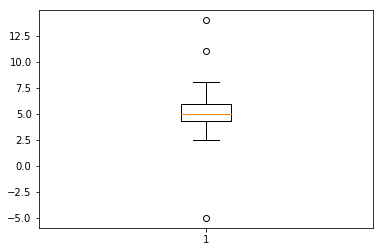

In [12]:
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()

## Correlation 

**Correlation** is used to _test relationships between quantitative variables_

Some examples of data that have a high correlation:

1. Your caloric intake and your weight
1. The amount of time your study and your GPA

**Question**: what is negative correlation?

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior. 

## Activity: Obtain the correlation among all features of iris dataset

1. Review the iris dataset. What are the features? 
1. Eliminate two columns `['Id', 'Species']`
1. Compute the correlation among all features.
    1. **Hint**: Use `df.corr()`
1. Plot the correlation by heatmap and corr plot in Seaborn -> `sns.heatmap`, `sns.corrplot`
1. Write a function that computes the correlation (Pearson formula)
    1. **Hint**: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
1. Compare your answer with `scipy.stats.pearsonr` for any given two features

<img src="./Images/iris_vis.jpg">

0.8717541573048714
(0.8717541573048712, 1.0384540627941809e-47)


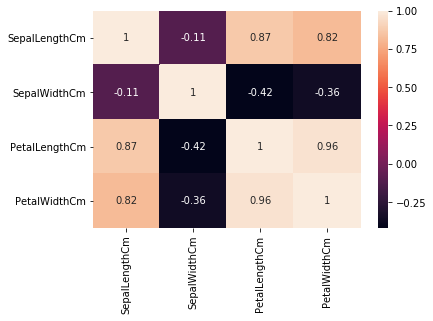

In [13]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))

## Statistical Analysis

We can approxite the histogram of a dataset with a combination of Gaussian (Normal) distribution functions:

    Gaussian Mixture Model (GMM)
    
    Kernel Density Estimation (KDE)

## What is the goal for using GMM?

- We want to appriximate the density (histogram) of any given data sample with a combination of Normal Distribitions

- How many Normal Distributions we need is defined by us (2 or 3 or 4,...)

## Activity : Fit a GMM to a given data sample 

Task: 

1. Generate the concatination of the random variables as follows:

`x_1 = np.random.normal(-5, 1, 3000)`

`x_2 = np.random.normal(2, 3, 7000) `

`x = np.concatenate((x_1, x_2))`

2. Plot the histogram of `x`
3. Obtain the weights, mean and variances of each Gassuian

You will need to use the following in your solution: 
```python
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2)

gmm.fit(x.reshape(-1,1))
```

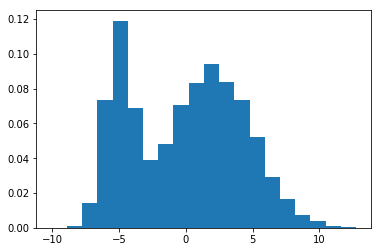

[[ 2.09650276]
 [-4.97020333]]
[[[8.57778373]]

 [[1.07352143]]]
[0.68948643 0.31051357]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)

## The GMM has learned the probability density function of our data sample

Let's generate the samples from the GMM:



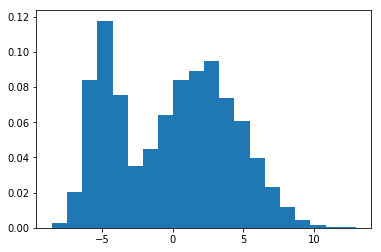

In [17]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

## Question: Are the samples in z and x the same?

- Not their samples, but we know that the _pdf of x and the pdf of z are the same_

## Kernel Density Estimation (KDE)

**Kernel density estimation (KDE)** is a non-parametric way to estimate the Probability Density Function (PDF) of a data sample. In other words _the goal of KDE is to find PDF for a given data sample._

We can use the below formula to approximate the PDF of the dataset:

$p(x) = \frac{1}{Nh}\sum_{i = 1}^{N} \ K(\frac{x - x_i}{h})$

where $h$ is a bandwidth and $N$ is the number of data points

## Activity: Apply KDE on a given data sample

**Task**: Apply KDE on the previously generated sample data `x`

**Hint**: use 

`kde = KernelDensity(kernel='gaussian', bandwidth=0.6)`

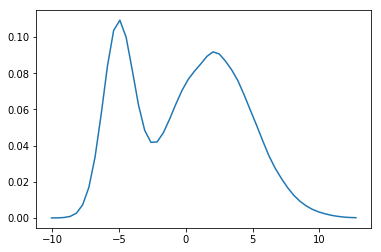

In [19]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

## The KDE has learned the probability density function of our data sample

Let's generate the samples from the KDE:

In [ ]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

## KDE can learn handwitten digits distribution and generate new digits

http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html